<a href="https://colab.research.google.com/github/abhinav69-dogra/Netflix-stock-prediction/blob/master/Netflixstock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving NFLX.csv to NFLX (1).csv


In [ ]:
df = pd.read_csv('NFLX.csv')
df.head(6)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


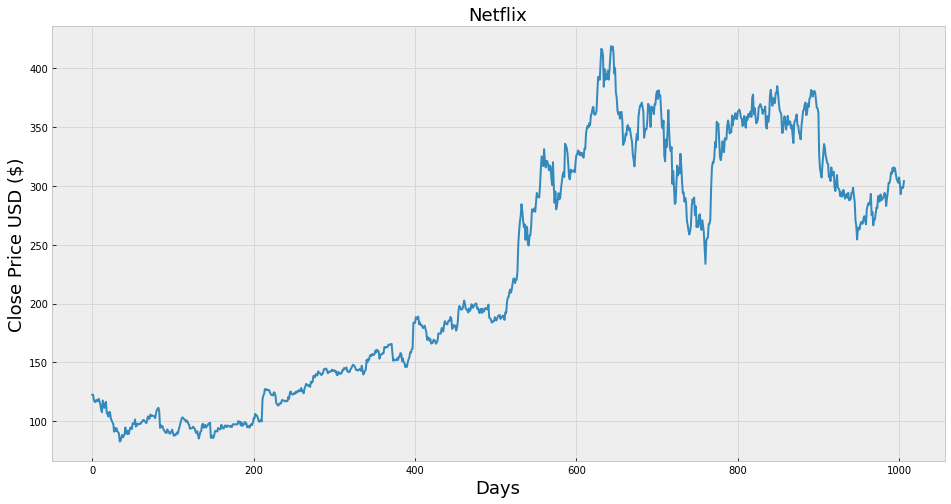

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Netflix', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [ ]:
future_days = 25

df['Prediction'] = df[['Close']].shift(-future_days)

df.tail(4)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [ ]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [ ]:
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [ ]:
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  283.109985 289.619995 295.029999 311.690002
 302.600006 253.669998 311.690002 310.480011 315.549988 312.48999
 315.929993 315.929993 325.160004 315.339996 285.769989 267.619995
 307.350006 302.5      293.119995 298.929993 320.269989 298.5
 304.209991]

[277.51589696 273.93637247 270.88323856 283.27762602 285.62249073
 288.11094262 286.8858624  288.82876362 295.59542964 278.31985361
 280.95186396 270.07928191 274.46276305 274.68290535 279.7746557
 284.59839178 283.97628599 293.77695551 289.91028538 289.33602284
 295.12643315 290.50367929 291.03964944 291.97761274 293.89180208]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


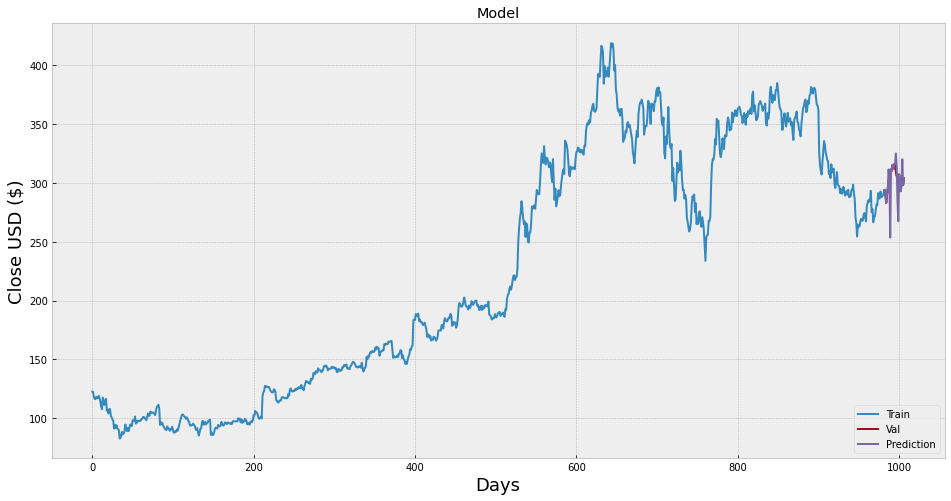

In [ ]:
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


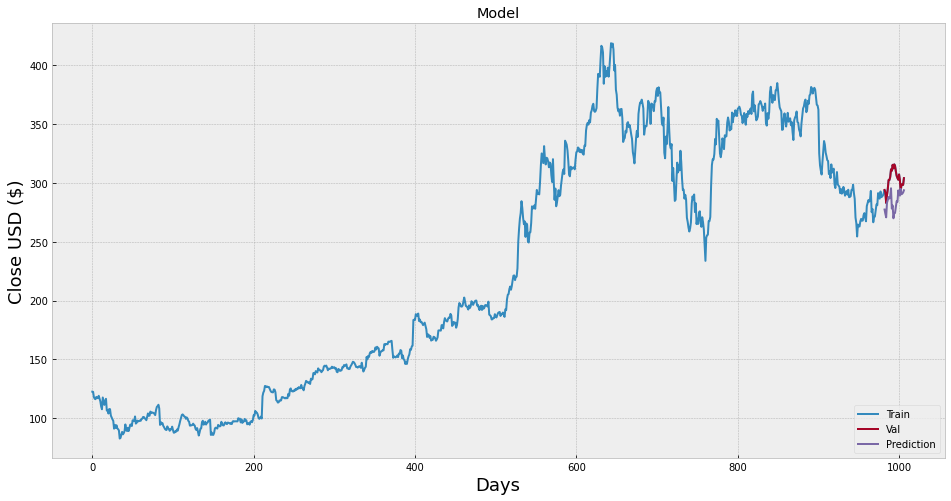

In [ ]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()